### Sample Code from SciPy

In [1]:
from scipy import signal
import numpy as np
from scipy.io import wavfile
fs, data = wavfile.read("9khz-tone.wav")
import matplotlib.pyplot as plt


In [2]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') /128



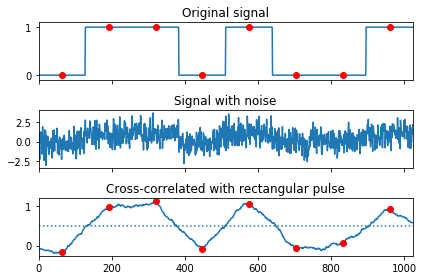

In [3]:
clock = np.arange(64, len(sig), 128)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

### Testing 15kHz Signal and Outputs of Match Filters

In [4]:
data.shape

(182151,)

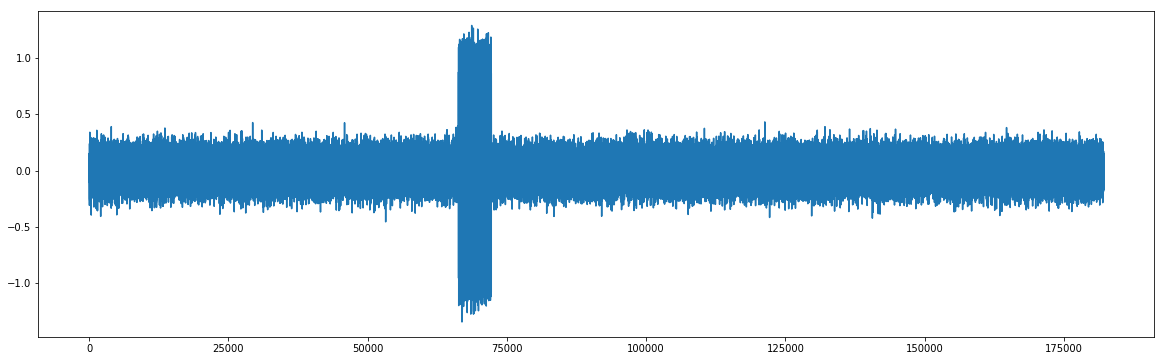

In [5]:
#Adding noise to the data signal
data_noise = data + (np.random.randn(len(data))/10)

#Extracting the signal from data for correlation
start = next((i for i, x in enumerate(data) if x), None)
end = len(data) - (next((i for i, x in enumerate(data[::-1]) if x), None))

#View data and correlation signal
plt.figure(figsize=(20,6))
plt.plot(data_noise)
plt.show()

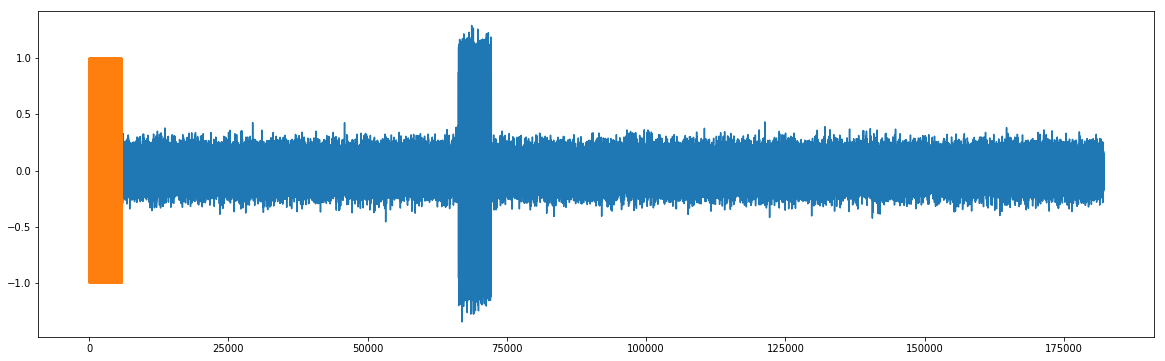

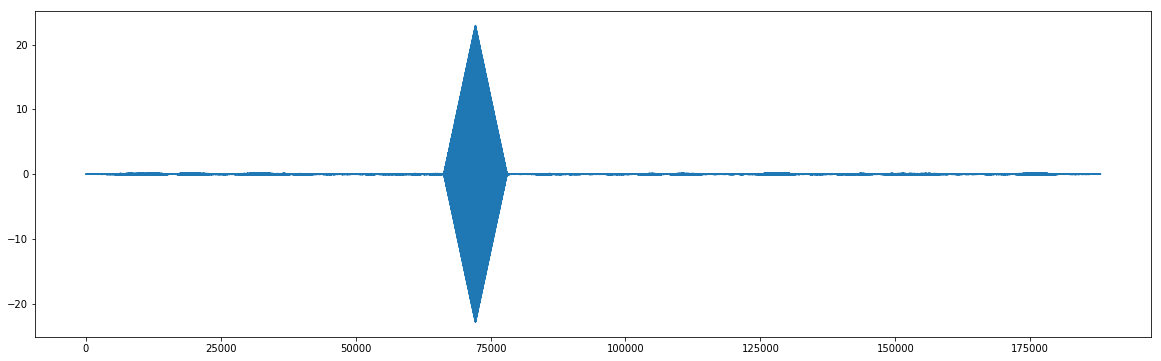

In [6]:
matchSignal = data[start:end]
corr = signal.correlate(data_noise, matchSignal, mode='full') / 128

plt.figure(figsize=(20,6))
plt.plot(data_noise)
plt.plot(matchSignal)
plt.show()

plt.figure(figsize=(20,6))
plt.plot(corr)
plt.show()

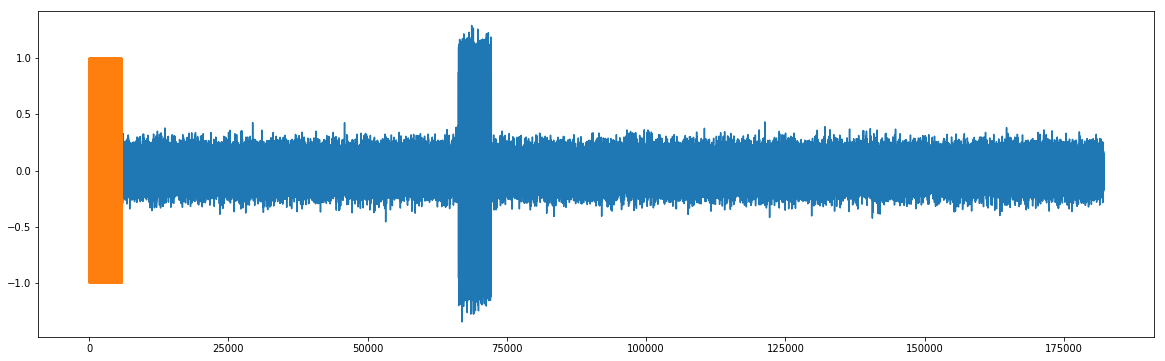

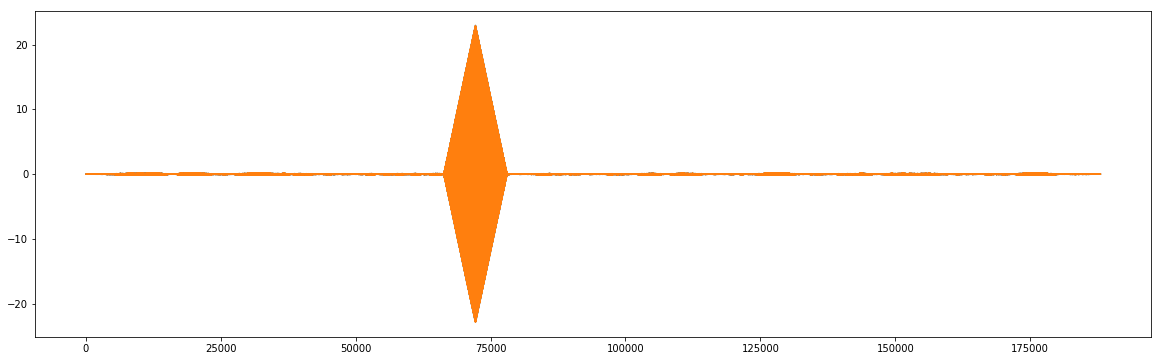

In [7]:
signal_shift = np.roll(matchSignal,2)
corr2 = signal.correlate(data_noise, signal_shift, mode='full') / 128

plt.figure(figsize=(20,6))
plt.plot(data_noise)
plt.plot(matchSignal)
plt.show()

plt.figure(figsize=(20,6))
plt.plot(corr)
plt.plot(corr2)
plt.show()

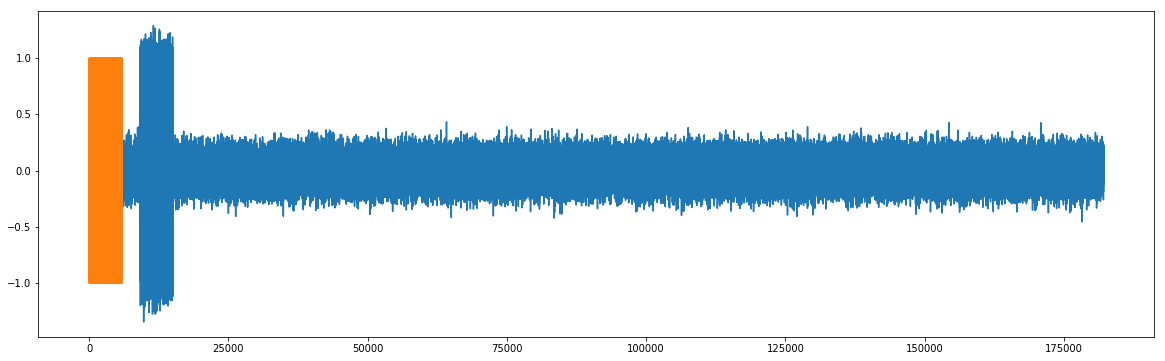

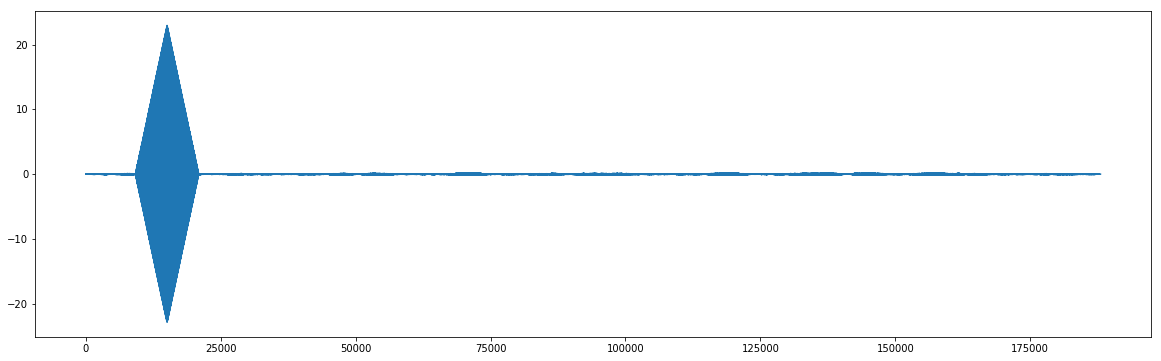

In [8]:
shift_value = 125000
messy_data = np.roll(data_noise,shift_value)
corr3 = signal.correlate(messy_data, matchSignal, mode='full') / 128

plt.figure(figsize=(20,6))
plt.plot(messy_data)
plt.plot(matchSignal)
plt.show()

plt.figure(figsize=(20,6))
plt.plot(corr3)
plt.show()

Determine Whether the sample timings are correct or not

In [9]:
#actual_start = (start + shift_value) % 182151
actual_start = start

maxPeak = np.argmax(corr)
minPeak = np.argmin(corr)

topDiff = abs(actual_start - (maxPeak - (len(matchSignal)/2)))
botDiff = abs(actual_start - (minPeak - (len(matchSignal)/2)))

print("Top Diff: " + topDiff.astype(str) + " Samples")
print("Bot Diff: " + botDiff.astype(str) + " Samples")

# signal_start = next((i for i, x in enumerate(data) if x), None)

Top Diff: 2938.5 Samples
Bot Diff: 2960.5 Samples


#### Match Filter to Determine Start of Signal
#### Using Donovan's Signal Simulator